In [1]:
import ROOT
import os

Welcome to JupyROOT 6.30/02


In [2]:
rootFile_pattern = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/test_efficiency_era/pps-test-re-tracking-efficiency/{run}/outputEfficiencyAnalysisDQMHarvester_run{run}.root'
run = 366933
rootFile = rootFile_pattern.format(run=run)

outputFolder = 'plots/'
if not os.path.isdir(outputFolder):
    print('Folder '+outputFolder+' not found. Creating it...')
    os.mkdir(outputFolder)

plotPubStatus = 'Preliminary'

In [3]:
def getPlot(filename,sector,station,hist_pattern):
    """Get the track hit distribution from the DQM file"""
    file = ROOT.TFile(filename)
    arm = 0 if sector == '45' else 1
    hist_path = hist_pattern.format(
        sector=sector,
        station=station,
        arm=arm
    )
    
    if not file:
        print(f'Failed to open file: {filename}')
        file.Close()
        return None
    
    h = file.Get(hist_path)
    if not h:
        print(f'Failed to retrieve histogram: {hist_path}')
        file.Close()
        return None
    
    # Create a copy of the histogram
    hist_class = h.Class().GetName()
    if hist_class == 'TH1D':
        hist = ROOT.TH1D(h)
    elif hist_class == 'TH2D':
        hist = ROOT.TH2D(h)
    else:
        print(f'Found histogram of non-supported class: {hist_class}')
        file.Close()
        return None
        
    # Pass the ownership to the top-level application
    hist.SetDirectory(0)
    
    return hist

In [4]:
def makeTrackDistPlot(rootFile,sector,station,save_output=False,y_range=(-8,15)):
    track_distribution_pattern = 'DQMData/Run 999999/Arm{arm}/Run summary/st{station}/rp3/h2TrackHitDistribution_arm{arm}_st{station}_rp3'
    hist = getPlot(rootFile,sector,station,track_distribution_pattern)
    
    st_m = '220' if station == '2' else '210'

    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptTitle(0)
    ROOT.gStyle.SetPalette(ROOT.kViridis)

    enlarge_factor = 1.5
    right_margin = 0.15
    canvas = ROOT.TCanvas('c'+hist.GetName(),'c'+hist.GetName(),round(104*6*enlarge_factor),round(160*4*enlarge_factor)) # Canvas sized to make the pixel proportions right
    hist.SetDirectory(ROOT.gDirectory)
    canvas.SetRightMargin(right_margin)
    
    hist.GetXaxis().SetRangeUser(0,19)
    hist.GetYaxis().SetRangeUser(*y_range)
    hist.GetXaxis().SetTitleSize(0.04)
    hist.GetXaxis().SetTitleOffset(1)
    hist.GetYaxis().SetTitleSize(0.04)
    hist.GetYaxis().SetTitleOffset(1)

    bin_area = hist.GetXaxis().GetBinWidth(1)*hist.GetYaxis().GetBinWidth(1)
    hist.GetZaxis().SetTitle('Tracks/{bin_area:.3f} mm^{{2}}'.format(bin_area=bin_area))
    hist.GetZaxis().SetTitleSize(0.04)
    hist.GetZaxis().SetTitleOffset(1.25)
    
    
    hist.DrawClone("colz")

    # Add CMS Watermark
    latex = ROOT.TLatex()

    cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{'+plotPubStatus+'}}'
    stationTag = '#scale[0.76]{{#font[42]{{{sector}-{station}-fr}}}}'.format(sector=sector,station=st_m)
    year_energy_tag = '#scale[0.76]{#font[42]{2023 (13.6 TeV)}}'
    
    latex.DrawLatexNDC(0.15,0.85,cmsText)
    latex.SetTextAlign(31)
    latex.DrawLatexNDC(1-right_margin-0.01,0.85,stationTag)
    latex.DrawLatexNDC(1-right_margin-0.01,0.91,year_energy_tag)

    canvas.SetLogz(True)
    if save_output:
        canvas.SaveAs(outputFolder+'/'+hist.GetName()+'.png')
        canvas.SaveAs(outputFolder+'/'+hist.GetName()+'.pdf')
    return canvas

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ch2TrackHitDistribution_arm0_st0_rp3
Info in <TCanvas::Print>: png file plots//h2TrackHitDistribution_arm0_st0_rp3.png has been created
Info in <TCanvas::Print>: pdf file plots//h2TrackHitDistribution_arm0_st0_rp3.pdf has been created


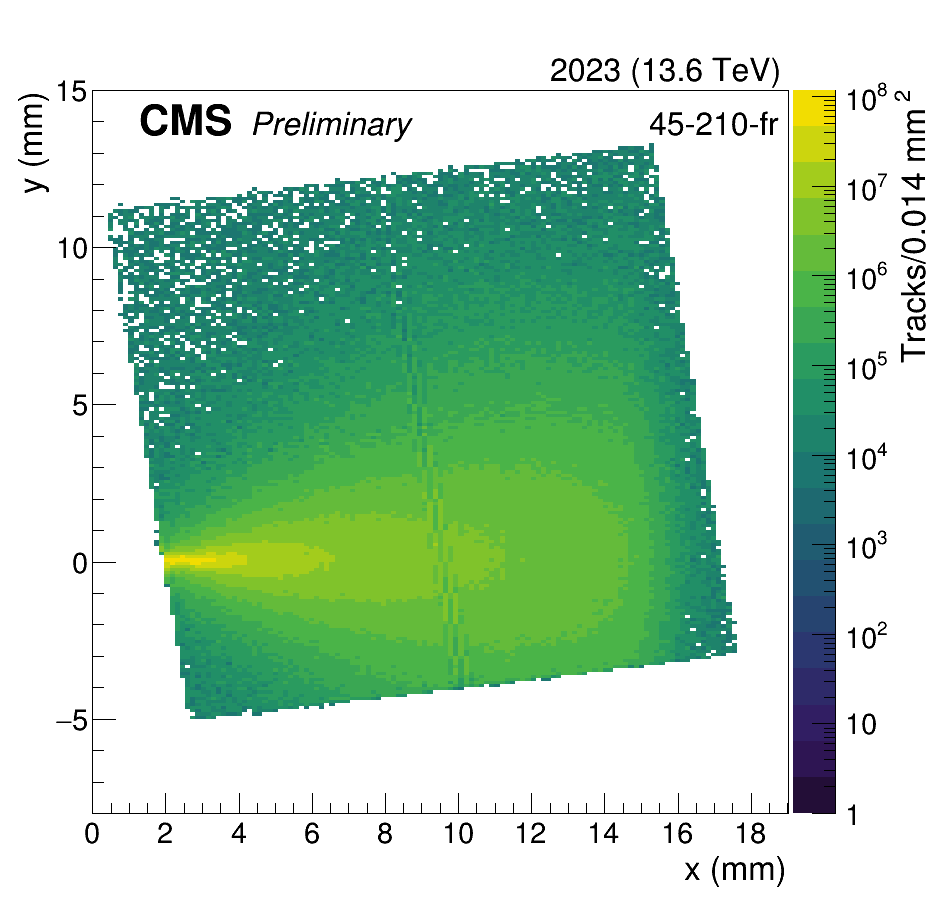

In [61]:
sector = '45'
station = '0'
c = makeTrackDistPlot(rootFile,sector,station,save_output=True)
c.DrawClone()

Info in <TCanvas::Print>: png file plots//h2TrackHitDistribution_arm0_st2_rp3.png has been created
Info in <TCanvas::Print>: pdf file plots//h2TrackHitDistribution_arm0_st2_rp3.pdf has been created


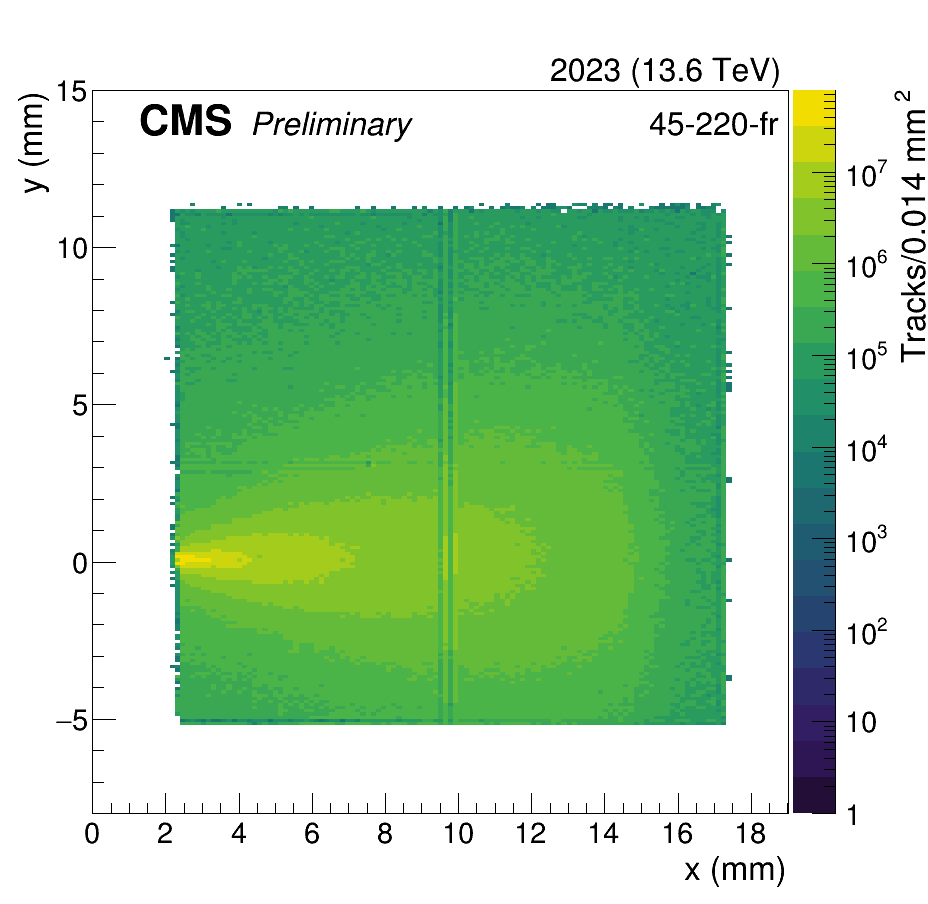

In [62]:
sector = '45'
station = '2'
c = makeTrackDistPlot(rootFile,sector,station,save_output=True)
c.DrawClone()

Info in <TCanvas::Print>: png file plots//h2TrackHitDistribution_arm1_st0_rp3.png has been created
Info in <TCanvas::Print>: pdf file plots//h2TrackHitDistribution_arm1_st0_rp3.pdf has been created


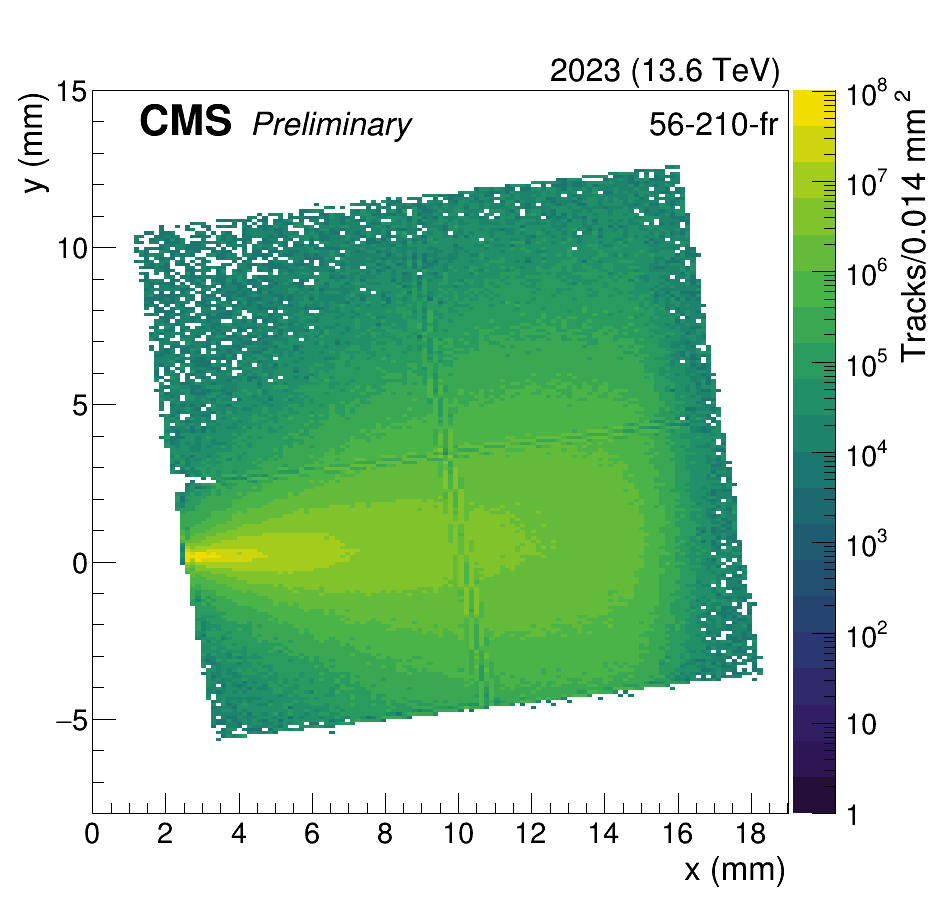

In [63]:
sector = '56'
station = '0'
c = makeTrackDistPlot(rootFile,sector,station,save_output=True)
c.DrawClone()

Info in <TCanvas::Print>: png file plots//h2TrackHitDistribution_arm1_st2_rp3.png has been created
Info in <TCanvas::Print>: pdf file plots//h2TrackHitDistribution_arm1_st2_rp3.pdf has been created


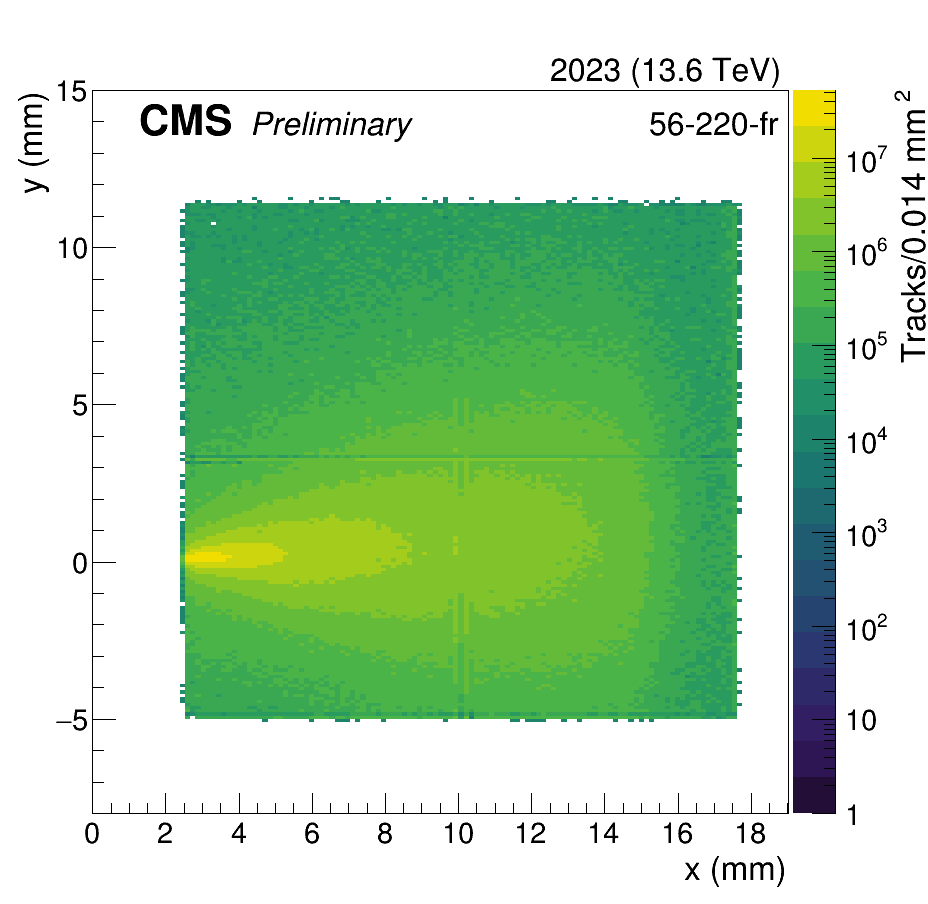

In [64]:
sector = '56'
station = '2'
c = makeTrackDistPlot(rootFile,sector,station,save_output=True)
c.DrawClone()

In [7]:
def makeTrackMultPlot(sector,save_output=False):
    
    color_near = ROOT.kBlue
    color_far = ROOT.kRed
    track_distribution_pattern = 'DQMData/Run 999999/Arm{arm}/Run summary/st{station}/rp3/h1NumberOfTracks_arm{arm}_st{station}_rp3'
    hist_near = getPlot(rootFile,sector,'0',track_distribution_pattern)
    hist_far = getPlot(rootFile,sector,'2',track_distribution_pattern)
    
    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptTitle(0)

    enlarge_factor = 1.5
    canvas = ROOT.TCanvas('c'+hist_near.GetName(),'c'+hist_near.GetName(),round(104*6*enlarge_factor),round(160*4*enlarge_factor))
    canvas.SetLeftMargin(0.125)
    hist_near.SetDirectory(ROOT.gDirectory)
    hist_far.SetDirectory(ROOT.gDirectory)
    hist_near.Scale(1./hist_near.Integral())
    hist_far.Scale(1./hist_far.Integral())
    
    hist_near.GetXaxis().SetRangeUser(0,10.5)
    
    if hist_near.GetMaximum() > hist_far.GetMaximum():
        hist_near.GetYaxis().SetRangeUser(0,hist_near.GetMaximum()*1.1)
    else:
        hist_near.GetYaxis().SetRangeUser(0,hist_far.GetMaximum()*1.1)
    
    hist_near.GetXaxis().SetTitleSize(0.04)
    hist_near.GetXaxis().SetTitleOffset(1)
    hist_near.GetYaxis().SetTitleSize(0.04)
    hist_near.GetYaxis().SetTitleOffset(1.4)
    hist_near.SetLineWidth(2)
    hist_near.SetMarkerStyle(20)
    hist_near.SetMarkerSize(2)
    hist_near.SetMarkerColor(color_near)
    hist_near.SetLineColor(color_near)
    hist_near.SetMarkerColor(color_near)
    
    hist_near.GetXaxis().SetTitle('Track multiplicity')
    hist_near.GetYaxis().SetTitle('Frequency')
    
    hist_far.SetLineColor(color_far)
    hist_far.SetMarkerColor(color_far)
    hist_far.SetMarkerStyle(21)
    hist_far.SetMarkerSize(2)
    hist_far.SetLineWidth(2)

    # Add legend
    hist_near.SetTitle('Track multiplicity '+sector+'-210-fr')
    hist_far.SetTitle('Track multiplicity '+sector+'-220-fr')
    
    hist_near.DrawClone('HIST')
    hist_far.DrawClone('HIST same')
    
    ROOT.gStyle.SetLegendTextSize(0.038)
    ROOT.gStyle.SetLegendFont(42)
    leg = canvas.BuildLegend(0.35,0.7,0.88,0.85)
    leg.SetBorderSize(0)
    
    hist_near.DrawClone('P same')
    hist_far.DrawClone('P same')
    
    
    # Add CMS Watermark
    latex = ROOT.TLatex()
    cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{'+plotPubStatus+'}}'
    year_energy_tag = '#scale[0.76]{#font[42]{2023 (13.6 TeV)}}'

    latex.SetTextAlign(31)
    latex.DrawLatexNDC(0.89,0.85,cmsText)
    latex.DrawLatexNDC(0.89,0.91,year_energy_tag)

    mean_near = f'{hist_near.GetMean():.2f}'
    mean_far = f'{hist_far.GetMean():.2f}'
    meanText_near ='#scale[0.76]{#font[42]{Mean '+sector+'-210-fr: '+mean_near+'}}'
    meanText_far ='#scale[0.76]{#font[42]{Mean '+sector+'-220-fr: '+mean_far+'}}'
    latex.SetTextAlign(13)
    latex.SetTextColor(color_near)
    latex.DrawLatexNDC(0.56,0.68,meanText_near)
    latex.SetTextColor(color_far)
    latex.DrawLatexNDC(0.56,0.61,meanText_far)
    
    latex.SetTextAlign(21)
    # canvas.SetLogy()
    if save_output:
        canvas.SaveAs(outputFolder+'/TrackMultiplicity_'+sector+'.png')
        canvas.SaveAs(outputFolder+'/TrackMultiplicity_'+sector+'.pdf')
    return canvas

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ch1NumberOfTracks_arm0_st0_rp3
Info in <TCanvas::Print>: png file plots//TrackMultiplicity_45.png has been created
Info in <TCanvas::Print>: pdf file plots//TrackMultiplicity_45.pdf has been created


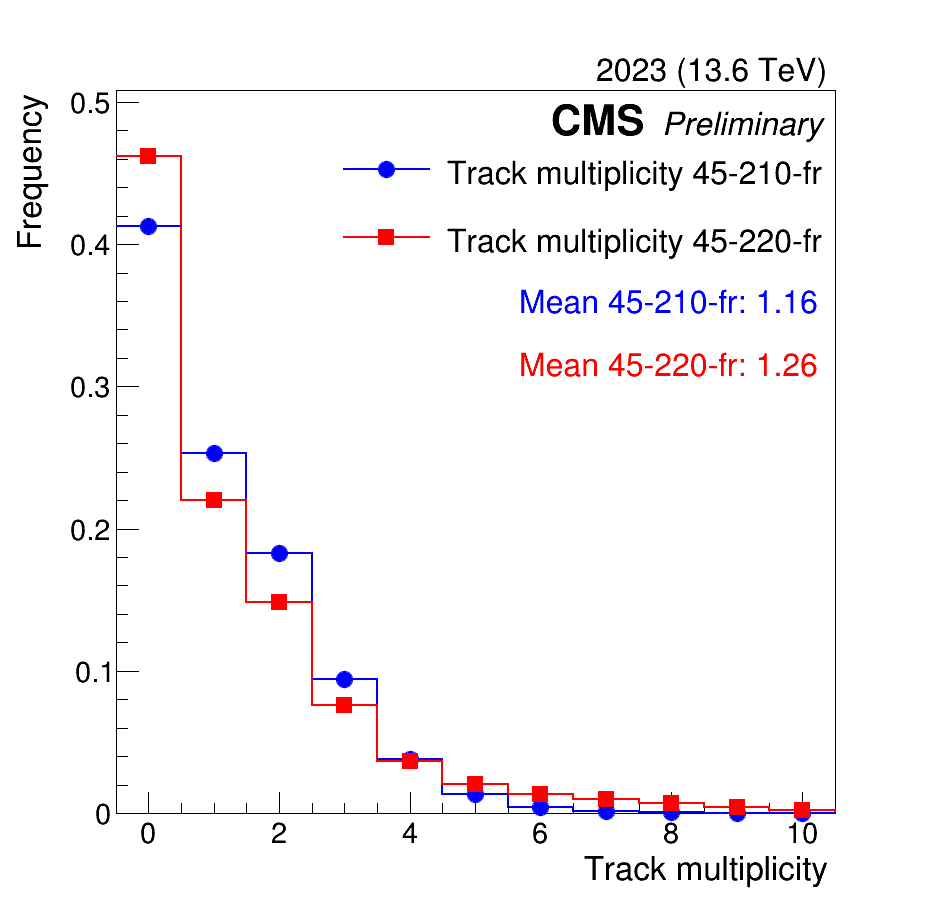

In [8]:
sector = '45'
c = makeTrackMultPlot(sector,save_output=True)
c.DrawClone()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ch1NumberOfTracks_arm1_st0_rp3
Info in <TCanvas::Print>: png file plots//TrackMultiplicity_56.png has been created
Info in <TCanvas::Print>: pdf file plots//TrackMultiplicity_56.pdf has been created


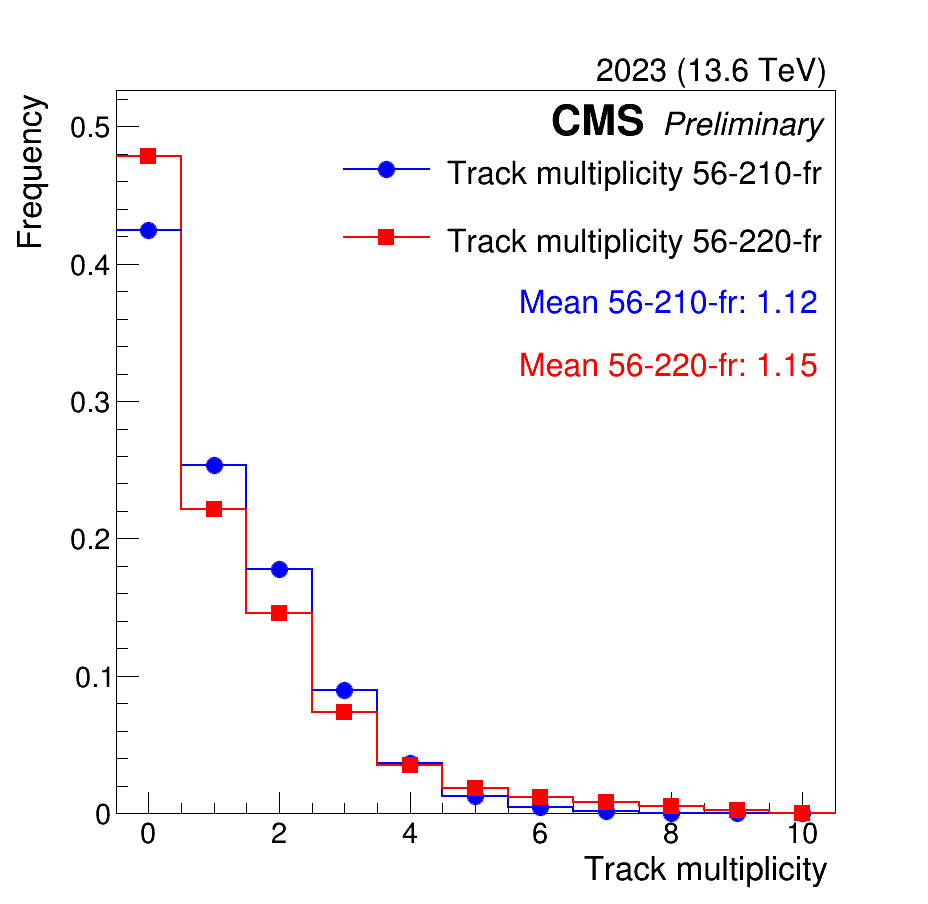

In [10]:
sector='56'
c = makeTrackMultPlot(sector,save_output=True)
c.DrawClone()

In [74]:
rootFile_beforeMovement = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/2023_movement_plot_v1/pps-test-re-tracking-efficiency/367838/outputEfficiencyAnalysisDQMHarvester_run367838.root'
rootFile_afterMovement = '/eos/cms/store/group/dpg_ctpps/comm_ctpps/pps-automation/dev/pps-test-re-tracking-efficiency/2023_movement_plot_v1/pps-test-re-tracking-efficiency/367883/outputEfficiencyAnalysisDQMHarvester_run367883.root'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ch2TrackHitDistribution_arm1_st2_rp3


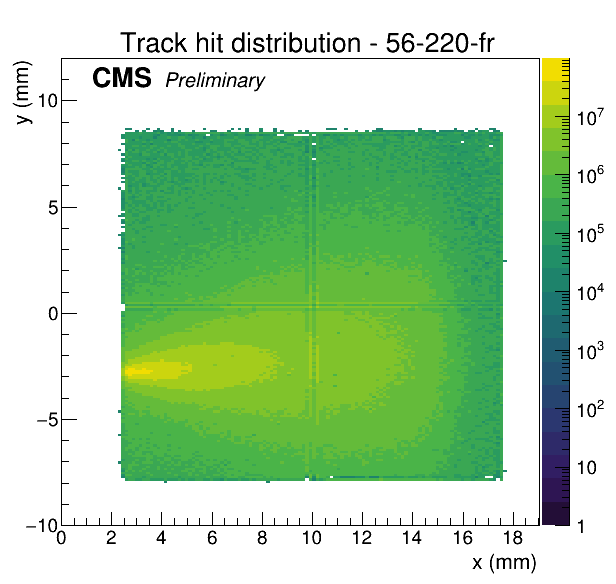

In [10]:
sector = '56'
station = '2'
c = makeTrackDistPlot(rootFile_beforeMovement,sector,station,False,(-10,12))
c.DrawClone()

In [145]:
def getBeamAxis(hist):
    """Return the beam axis fitted line"""
    fit_minX = 2.5
    fit_maxX = 5
    fit_minBin = hist.GetXaxis().FindBin(fit_minX)
    fit_maxBin = hist.GetXaxis().FindBin(fit_maxX)
    
    ymax_bin = -1
    py = hist.ProjectionY()
    ymax_bin = py.GetMaximumBin()
    ymax = py.GetXaxis().GetBinCenter(ymax_bin)
    fit_yrange = py.GetRMS() / 3
    
    gaus = ROOT.TF1("gaus", "gaus", ymax-fit_yrange, ymax+fit_yrange);
    slices = ROOT.TObjArray()
    hist.FitSlicesY(gaus, fit_minBin, fit_maxBin, 0, "QNRG2",slices)
    line = ROOT.TF1('line','pol1',fit_minX,fit_maxX)
    _ = slices[1].Fit(line,'SQNR')
    
    slices[1].SetDirectory(0)
    return slices[1],line

def makeMovementPlot(rootFile_before,rootFile_after,sector,station,save_output=False):
    track_distribution_pattern = 'DQMData/Run 999999/Arm{arm}/Run summary/st{station}/rp3/h2TrackHitDistribution_arm{arm}_st{station}_rp3'
    hist_before = getPlot(rootFile_before,sector,station,track_distribution_pattern)
    
    st_m = '220' if station == '2' else '210'

    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptTitle(0)
    ROOT.gStyle.SetPalette(ROOT.kViridis)

    enlarge_factor = 1.5
    canvas = ROOT.TCanvas('c'+hist_before.GetName(),'c'+hist_before.GetName(),round(104*12*enlarge_factor),round(160*4*enlarge_factor)) # Canvas sized to make the pixel proportions right
    canvas_zoom = ROOT.TCanvas('c'+hist_before.GetName()+'zoom','c'+hist_before.GetName()+'zoom',round(104*6*enlarge_factor),round(160*4*enlarge_factor))
    hist_before.SetDirectory(ROOT.gDirectory)
    canvas.Divide(2)
    canvas.cd(1)
    
    hist_before.GetXaxis().SetRangeUser(1,19)
    hist_before.GetYaxis().SetRangeUser(-10,14)
    hist_before.GetXaxis().SetTitleSize(0.04)
    hist_before.GetXaxis().SetTitleOffset(1)
    hist_before.GetYaxis().SetTitleSize(0.04)
    hist_before.GetYaxis().SetTitleOffset(1)
    
    bin_area = hist_before.GetXaxis().GetBinWidth(1)*hist_before.GetYaxis().GetBinWidth(1)
    hist_before.GetZaxis().SetTitle('Tracks/{bin_area:.3f} mm^{{2}}'.format(bin_area=bin_area))
    hist_before.GetZaxis().SetTitleSize(0.04)
    hist_before.GetZaxis().SetTitleOffset(1.25)

    right_margin = 0.15
    ROOT.gPad.SetRightMargin(right_margin)
    hist_before.DrawClone("colz")
    
    # Fit beam axis before
    beamAxis_before_points,beamAxis_before = getBeamAxis(hist_before)
    beamAxis_before.SetLineWidth(2)
    beamAxis_before.SetLineColor(ROOT.kRed)
    beamAxis_before_points.SetLineWidth(2)
    beamAxis_before_points.SetLineColor(ROOT.kBlack)
    #beamAxis_before_points.DrawCopy("Esame")
    beamAxis_before.DrawCopy("Lsame")
    
    global leg_before
    leg_before = ROOT.TLegend(.13,.79,.75,.84)
    leg_before.SetBorderSize(0)
    
    leg_before.AddEntry(beamAxis_before,'Beam axis before movement','l')
    leg_before.Draw('same')
    
    latex = ROOT.TLatex()
    cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{'+plotPubStatus+'}}'
    stationTag = '#scale[0.76]{{#font[42]{{{sector}-{station}-fr}}}}'.format(sector=sector,station=st_m)
    year_energy_tag = '#scale[0.76]{#font[42]{2023 (13.6 TeV)}}'

    latex.DrawLatexNDC(0.15,0.85,cmsText)
    latex.SetTextAlign(31)
    latex.DrawLatexNDC(1-right_margin-0.01,0.91,year_energy_tag)
    latex.DrawLatexNDC(1-right_margin-0.01,0.85,stationTag)

    ROOT.gPad.SetLogz(True)

    
    canvas.cd(2)
    ROOT.gPad.SetRightMargin(0.15)
    
    hist_after = getPlot(rootFile_after,sector,station,track_distribution_pattern)
    hist_after.SetDirectory(ROOT.gDirectory)

    hist_after.GetXaxis().SetRangeUser(1,19)
    hist_after.GetYaxis().SetRangeUser(-10,14)
    hist_after.GetXaxis().SetTitleSize(0.04)
    hist_after.GetXaxis().SetTitleOffset(1)
    hist_after.GetYaxis().SetTitleSize(0.04)
    hist_after.GetYaxis().SetTitleOffset(1)
    
    bin_area = hist_after.GetXaxis().GetBinWidth(1)*hist_after.GetYaxis().GetBinWidth(1)
    hist_after.GetZaxis().SetTitle('Tracks/{bin_area:.3f} mm^{{2}}'.format(bin_area=bin_area))
    hist_after.GetZaxis().SetTitleSize(0.04)
    hist_after.GetZaxis().SetTitleOffset(1.25)

    hist_after.DrawClone("colz")
    
    # Fit beam axis
    beamAxis_after_points,beamAxis_after = getBeamAxis(hist_after)
    beamAxis_after.SetLineWidth(2)
    beamAxis_after.SetLineColor(ROOT.kAzure)
    beamAxis_after_points.SetLineWidth(2)
    beamAxis_after_points.SetLineColor(ROOT.kAzure)
    #beamAxis_after_points.DrawCopy("Esame")
    beamAxis_after.DrawCopy("Lsame")
    beamAxis_before.DrawCopy("Lsame")
    
    global leg_after
    leg_after = ROOT.TLegend(.13,.73,.75,.84)
    leg_after.SetBorderSize(0)
    
    leg_after.AddEntry(beamAxis_before,'Beam axis before movement','l')
    leg_after.AddEntry(beamAxis_after,'Beam axis after movement','l')
    leg_after.Draw('same')
    
    latex = ROOT.TLatex() # Need to re-initialize TLatex here
    cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{'+plotPubStatus+'}}'
    stationTag = '#scale[0.76]{{#font[42]{{{sector}-{station}-fr}}}}'.format(sector=sector,station=st_m)
    year_energy_tag = '#scale[0.76]{#font[42]{2023 (13.6 TeV)}}'
    canvas.cd(2)
    latex.DrawLatexNDC(0.15,0.85,cmsText)
    latex.SetTextAlign(31)
    latex.DrawLatexNDC(1-right_margin-0.01,0.91,year_energy_tag)
    latex.DrawLatexNDC(1-right_margin-0.01,0.85,stationTag)

    ROOT.gPad.SetLogz(True)
    
    canvas_zoom.cd()
    canvas_zoom.SetLogz()
    canvas_zoom.SetLeftMargin(0.15)
    canvas_zoom.SetRightMargin(right_margin)
    
    hist_after.GetXaxis().SetRangeUser(2,9)
    hist_after.GetYaxis().SetRangeUser(-5,0)
    hist_after.GetYaxis().SetTitleOffset(1.4)
    hist_after.DrawClone('colz')
    beamAxis_after.SetNpx(1000)
    beamAxis_before.SetNpx(1000)
    beamAxis_after.DrawCopy("Lsame")
    beamAxis_before.DrawCopy("Lsame")
    latex = ROOT.TLatex() # Need to re-initialize TLatex here
    cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{'+plotPubStatus+'}}'
    year_energy_tag = '#scale[0.76]{#font[42]{2023 (13.6 TeV)}}'
    latex.DrawLatexNDC(0.15,0.91,cmsText)
    latex.SetTextAlign(31)
    latex.DrawLatexNDC(1-right_margin-0.01,0.91,year_energy_tag)

    evalPoint = (beamAxis_before.GetXmin() + beamAxis_before.GetXmax())/2.

    print('Movement found = ',1e3*(beamAxis_after.Eval(evalPoint)-beamAxis_before.Eval(evalPoint)),'um')
    arm = '0' if sector == '45' else '1'
    if save_output:
        canvas.SaveAs(outputFolder+'/MovementDiff_arm'+arm+'_station'+station+'_rp3.png')
        canvas.SaveAs(outputFolder+'/MovementDiff_arm'+arm+'_station'+station+'_rp3.pdf')
        canvas_zoom.SaveAs(outputFolder+'/MovementDiff_arm'+arm+'_station'+station+'_rp3_zoom.png')
        canvas_zoom.SaveAs(outputFolder+'/MovementDiff_arm'+arm+'_station'+station+'_rp3_zoom.pdf')
    return canvas,canvas_zoom

Movement found =  388.4561184112401 um


Warning in <TCanvas::Constructor>: Deleting canvas with same name: ch2TrackHitDistribution_arm1_st2_rp3
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ch2TrackHitDistribution_arm1_st2_rp3zoom
Info in <TCanvas::Print>: png file plots//MovementDiff_arm1_station2_rp3.png has been created
Info in <TCanvas::Print>: pdf file plots//MovementDiff_arm1_station2_rp3.pdf has been created
Info in <TCanvas::Print>: png file plots//MovementDiff_arm1_station2_rp3_zoom.png has been created
Info in <TCanvas::Print>: pdf file plots//MovementDiff_arm1_station2_rp3_zoom.pdf has been created


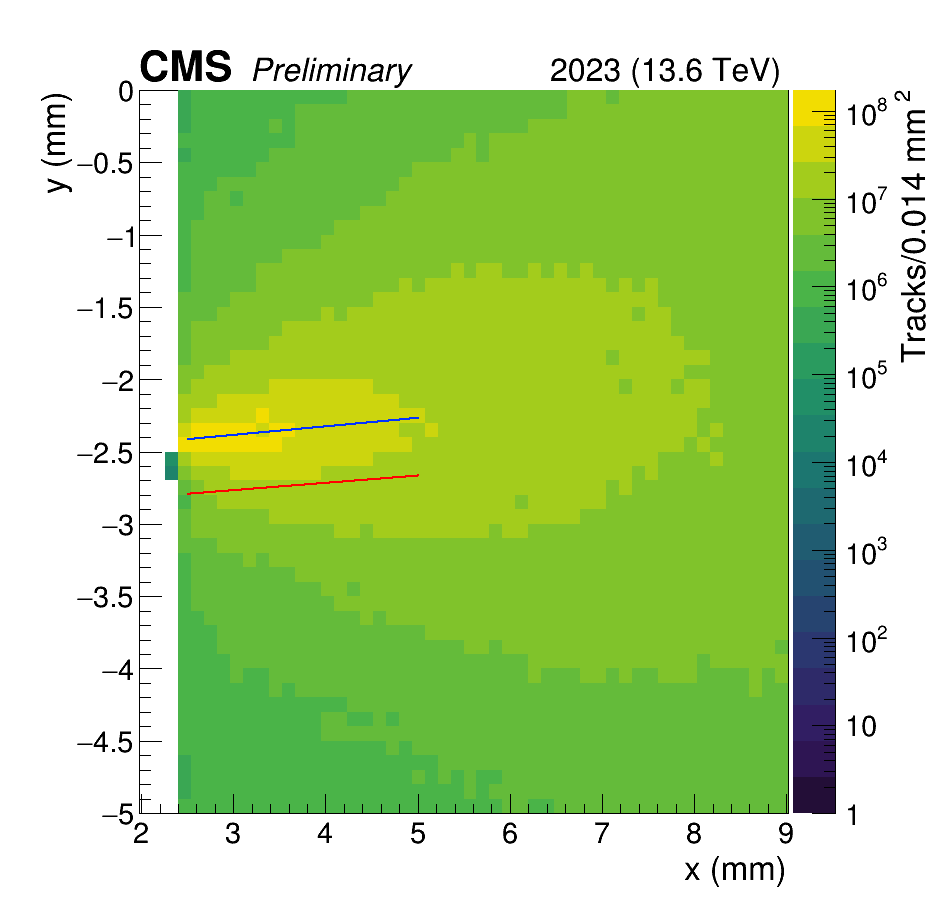

In [146]:
sector = '56'
station = '2'
c,c_zoom = makeMovementPlot(rootFile_beforeMovement,rootFile_afterMovement,sector,station,save_output=True)
c.DrawClone()
c_zoom.DrawClone()

### Helper plots (not to approve)

In [11]:
sector = '56'
station = '2'
track_distribution_pattern = 'DQMData/Run 999999/Arm{arm}/Run summary/st{station}/rp3/h2TrackHitDistribution_arm{arm}_st{station}_rp3'
hist = getPlot(rootFile_beforeMovement,sector,station,track_distribution_pattern)

Info in <TCanvas::Print>: png file plots//FindFitRange.png has been created


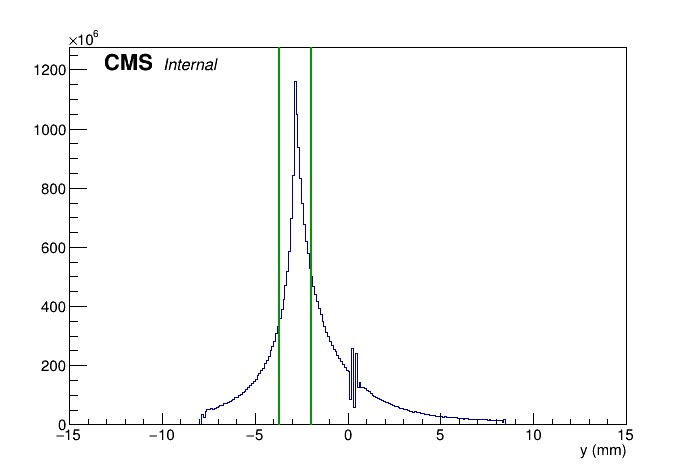

In [12]:
c = ROOT.TCanvas('c_py')

fit_minX = 2.5
fit_maxX = 5
fit_minBin = hist.GetXaxis().FindBin(fit_minX)
fit_maxBin = hist.GetXaxis().FindBin(fit_maxX)

ymax_bin = -1
py = hist.ProjectionY()
py.Draw('hist')
ymax_bin = py.GetMaximumBin()
ymax = py.GetXaxis().GetBinCenter(ymax_bin)
fit_yrange = py.GetRMS() / 3.
y_axis_max = py.GetMaximum()*1.1
py.GetYaxis().SetRangeUser(0,y_axis_max)
y_lim_low = ROOT.TLine(ymax-fit_yrange,0,ymax-fit_yrange,y_axis_max)
y_lim_low.SetLineWidth(2)
y_lim_low.SetLineColor(ROOT.kGreen+2)

y_lim_high = ROOT.TLine(ymax+fit_yrange,0,ymax+fit_yrange,y_axis_max)
y_lim_high.SetLineWidth(2)
y_lim_high.SetLineColor(ROOT.kGreen+2)
    
y_lim_low.Draw('same')
y_lim_high.Draw('same')
latex = ROOT.TLatex() 
cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{Internal}}'
latex.DrawLatexNDC(0.15,0.85,cmsText)
c.Draw()
c.SaveAs(outputFolder+'/FindFitRange.png')

Info in <TCanvas::Print>: png file plots//FitProjection.png has been created


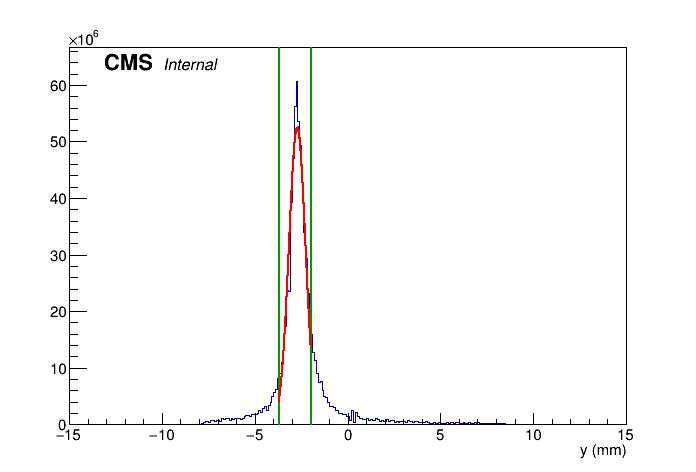

In [13]:
c = ROOT.TCanvas('c_fit')
c.cd()
sl = 10
projy = hist.ProjectionY('projy',fit_minBin+sl,fit_minBin+sl+1)
gaus = ROOT.TF1("gaus", "gaus", ymax-fit_yrange, ymax+fit_yrange);
gaus.SetNpx(1000)
y_axis_max = projy.GetBinContent(projy.GetMaximumBin())*1.1
projy.GetYaxis().SetRangeUser(0,y_axis_max)

y_lim_low = ROOT.TLine(ymax-fit_yrange,0,ymax-fit_yrange,y_axis_max)
y_lim_low.SetLineWidth(2)
y_lim_low.SetLineColor(ROOT.kGreen+2)
y_lim_high = ROOT.TLine(ymax+fit_yrange,0,ymax+fit_yrange,y_axis_max)
y_lim_high.SetLineWidth(2)
y_lim_high.SetLineColor(ROOT.kGreen+2)


projy.Draw('hist')
y_lim_low.Draw('same')
y_lim_high.Draw('same')
projy.Fit(gaus,'QR')
gaus.Draw('same')
latex = ROOT.TLatex() 
cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{Internal}}'
latex.DrawLatexNDC(0.15,0.85,cmsText)

c.Draw()
c.SaveAs(outputFolder+'/FitProjection.png')

Info in <TCanvas::Print>: png file plots//FitSlices.png has been created


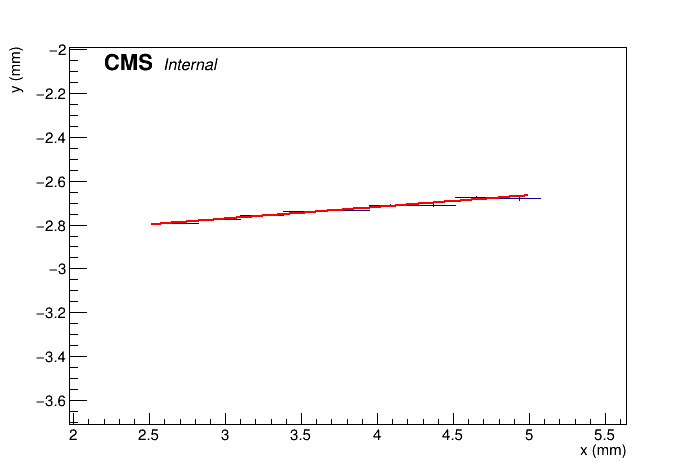

In [14]:
c = ROOT.TCanvas()
slices = ROOT.TObjArray()
hist.FitSlicesY(gaus, fit_minBin, fit_maxBin, 0, "QNRG2",slices)
line = ROOT.TF1('line','pol1',fit_minX,fit_maxX)

slices[1].GetXaxis().SetRangeUser(fit_minX -fit_maxX*0.1,fit_maxX*1.1)
slices[1].GetYaxis().SetRangeUser(ymax-fit_yrange,ymax+fit_yrange)
slices[1].GetYaxis().SetTitle('y (mm)')

slices[1].Draw()
slices[1].SetDirectory(0)
_ = slices[1].Fit(line,'SQR')

latex = ROOT.TLatex() 
cmsText = '#font[61]{CMS} #scale[0.76]{#font[52]{Internal}}'
latex.DrawLatexNDC(0.15,0.85,cmsText)

c.Draw()
c.SaveAs(outputFolder+'/FitSlices.png')